In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df=df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
df.shape

(100, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


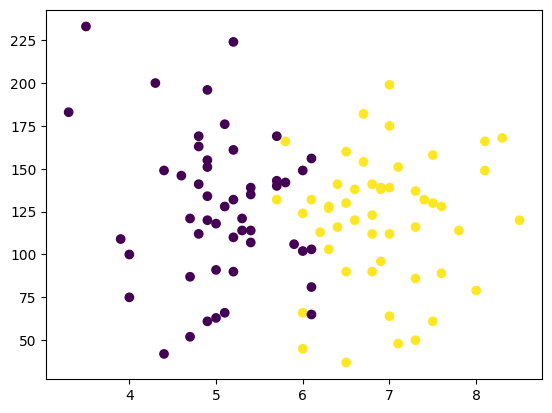

In [15]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [19]:
X=df.iloc[:,:2]
Y=df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [30]:
X_train

,cgpa,iq
10,6.0,45.0
64,7.0,64.0
75,4.8,169.0
5,7.1,48.0
95,4.3,200.0
...,...,...
74,6.7,154.0
56,6.1,65.0
1,5.9,106.0
36,5.7,140.0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
X_train=scaler.fit_transform(X_train)

In [37]:
X_test=scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf=LogisticRegression()

In [42]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [45]:
Y_pred=clf.predict(X_test)

In [46]:
Y_test

,placement
60,1
26,1
77,1
7,0
53,1
93,1
65,1
12,0
61,1
38,1


In [49]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(Y_test,Y_pred)

0.8

<Axes: >

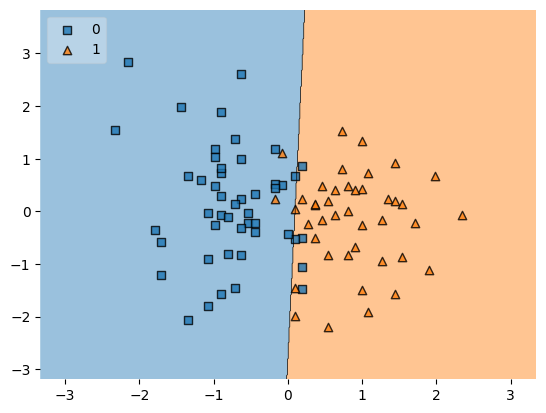

In [52]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)